# Thermal Images

In [1]:
import ee, eemont, geemap
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
ee.Initialize()
Map = geemap.Map()

## Location

In [3]:
coop = ee.Geometry.Rectangle(-111.807, 41.748,-111.800, 41.743)
golf = ee.Geometry.Rectangle(-111.793, 41.747, -111.786, 41.742)
point = ee.Geometry.Point([-111.796, 41.745])

Map.addLayer(coop,{},'COOP')
Map.addLayer(golf,{},'GOLF')


Map.centerObject(point, 16)
Map

Map(center=[41.745000000000005, -111.79600000000002], controls=(WidgetControl(options=['position', 'transparen…

## Thermal COOP

In [4]:
landsat8 = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") 

coop1 = ee.Image(landsat8
    .filterBounds(coop)
    .filterDate('2022-07-01', '2022-08-01')
    .sort('CLOUD_COVER_LAND')
    .first())

coop1 = coop1.select(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7','ST_B10'])


coop1 = coop1.multiply(0.00341802).add(149)

In [5]:
thermal1 = coop1.select('ST_B10')

# Set the visualization parameters
vis_params = {
    'min': 285,
    'max': 335,
    'palette': [ 'BFEFFF', '87CEFA', '33A1C9', 'FFB6C1', 'FF0000','8B0000'] 
}

Map.addLayer(thermal1, vis_params, "Thermal COOP 2022")

In [6]:
# landsat5 = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2")

# coop2 = ee.Image(landsat5
#      .filterBounds(coop)
#      .filterDate('1985-07-01', '1985-08-01')
#      .sort('CLOUD_COVER_LAND')
#      .first())

# coop2 = coop2.select(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'ST_B6'])


# coop2 = coop2.multiply(0.00341802).add(149)

In [7]:
# thermal3 = coop2.select('ST_B6')

# vis_params = {
#   'min': 290,
#   'max': 310,
#   'palette': [  'BFEFFF', '87CEFA', '33A1C9', 'FFB6C1', 'FF0000','8B0000']  
# }
# Map.addLayer(thermal3, vis_params, "Thermal COOP 1985")

### Clip and Mean of COOP

In [8]:
thermal1_coop = thermal1.clip(coop)
#thermal3_coop = thermal3.clip(coop)

In [9]:
thermal1_mean = thermal1.reduceRegion(reducer=ee.Reducer.mean(), geometry= coop, scale=30).get('ST_B10')

In [10]:
#thermal3_mean = thermal3.reduceRegion(reducer=ee.Reducer.mean(), geometry= coop, scale=30).get('ST_B6')

In [11]:
print('Average Thermal:', thermal1_mean.getInfo())

Average Thermal: 317.224898605113


In [12]:
#print('Average Thermal:', thermal3_mean.getInfo())

## Thermal GOLF

In [13]:
landsat8 = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") 

golf1 = ee.Image(landsat8
    .filterBounds(golf)
    .filterDate('2022-07-01', '2022-08-01')
    .sort('CLOUD_COVER_LAND')
    .first())

golf1 = golf1.select(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7','ST_B10'])


golf1 = golf1.multiply(0.00341802).add(149)

In [14]:
thermal2 = golf1.select('ST_B10')

vis_params = {
  'min': 285,
  'max': 335,
  'palette': [  'BFEFFF', '87CEFA', '33A1C9', 'FFB6C1', 'FF0000','8B0000']  
}
Map.addLayer(thermal2, vis_params, "Thermal Golf 2022")

In [15]:
# landsat5 = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2")

# golf2 = ee.Image(landsat5
#      .filterBounds(golf)
#      .filterDate('1985-07-01', '1985-08-01')
#      .sort('CLOUD_COVER_LAND')
#      .first())

# golf2 = golf2.select(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'ST_B6'])


# golf2 = golf2.multiply(0.00341802).add(149)

In [16]:
# thermal4 = golf2.select('ST_B6')

# vis_params = {
#   'min': 290,
#   'max': 315,
#   'palette': [  'BFEFFF', '87CEFA', '33A1C9', 'FFB6C1', 'FF0000','8B0000']  
# }
# Map.addLayer(thermal4, vis_params, "Thermal Golf 1985")

### Clip and Mean of Golf

In [17]:
thermal2_golf = thermal2.clip(golf)
#thermal4_golf = thermal4.clip(golf)

In [18]:
thermal2_mean = thermal2.reduceRegion(reducer=ee.Reducer.mean(), geometry= golf, scale=30).get('ST_B10')
#thermal4_mean = thermal4.reduceRegion(reducer=ee.Reducer.mean(), geometry= golf, scale=30).get('ST_B6')

In [19]:
print('Average Thermal:', thermal2_mean.getInfo())

Average Thermal: 312.2082364084116


In [20]:
#print('Average Thermal:', thermal4_mean.getInfo())

### Legend

In [21]:
import eefolium

In [22]:

labels = ['285', '295', '305', '315', '325', '335']

therm_palette = ['BFEFFF', '87CEFA', '33A1C9', 'FFB6C1', 'FF0000','8B0000']

map = eefolium.Map()

Map.add_legend(colors=therm_palette, labels=labels, title='Thermal')


## Save images

In [23]:
# import ee
# import urllib

# ee.Authenticate()
# ee.Initialize()


# url = thermal1.getThumbURL({
#     'min': 285,
#     'max': 335,
#     'palette': therm_palette,
#     'region': coop,
#     'dimensions': '800x600'
# })
# # Download the image to your local computer
# urllib.request.urlretrieve(url, 'Thermal_coop1_image.png')

In [24]:
# import ee
# import urllib

# ee.Authenticate()
# ee.Initialize()


# url = thermal2.getThumbURL({
#     'min': 285,
#     'max': 335,
#     'palette': therm_palette,
#     'region': golf,
#     'dimensions': '800x600'
# })
# # Download the image to your local computer
# urllib.request.urlretrieve(url, 'Thermal_golf1_image.png')

## Thermal Timeseries

In [25]:
stations = ee.FeatureCollection([
    ee.Feature(coop,{'station':0}),
    ee.Feature(golf,{'station':1})    
])

In [26]:
def maskSnow(image):
# // to Landsat 8 imagery.
    N = image.select('B5')
    G = image.select('B3')
    NDSI =image.normalizedDifference(['B3', 'B6'])
    snowPixels = (NDSI > 0.4) & (N >= 0.1) & (G > 0.11)
    return image.updateMask(~snowPixels)

In [27]:
L8 = (ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')
      .filterBounds(stations)
      .maskClouds()
      .scaleAndOffset()
      .select(['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10'])).map(maskSnow)

In [28]:
def maskSnow(image):
# // to Landsat 5 imagery.
    N = image.select('SR_B4')
    G = image.select('SR_B2')
    NDSI =image.normalizedDifference(['SR_B2', 'SR_B5'])
    snowPixels = (NDSI > 0.4) & (N >= 0.1) & (G > 0.11)
    return image.updateMask(~snowPixels)

In [29]:
L5 = (ee.ImageCollection("LANDSAT/LT05/C02/T1_L2")
      .filterBounds(stations)
      .maskClouds()
      .scaleAndOffset()
      .select(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'ST_B6'])).map(maskSnow)


In [30]:
def renameL5(image):
    temp=image.select('ST_B6').multiply(1).rename('kelvin')
    return image.addBands(temp)

In [31]:
def renameL8(image):
    temp=image.select('B10').multiply(1).rename('kelvin')
    return image.addBands(temp)

In [32]:
L5_renamed=L5.map(renameL5)
L8_renamed=L8.map(renameL8)

In [33]:
print(L5_renamed.first().bandNames().getInfo())
print(L8_renamed.first().bandNames().getInfo())

['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'ST_B6', 'kelvin']
['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10', 'kelvin']


In [34]:
merged = L5_renamed.merge(L8_renamed)
print(merged.first().bandNames().getInfo())


['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'ST_B6', 'kelvin']


In [35]:
collection = merged.select('kelvin').filter(ee.Filter.date('1985-07-01', '2022-07-01')).sort('system:time_start')

vis_params = {
  'min': 273,
  'max': 323,
  'palette': [  'BFEFFF', '87CEFA', '33A1C9', 'FFB6C1', 'FF0000','8B0000'],
}

first_image = collection.first()

Map.addLayer(first_image, vis_params, "First image")

Map


Map(bottom=6244248.0, center=[41.745000000000005, -111.79600000000002], controls=(WidgetControl(options=['posi…

In [36]:
labels = collection.aggregate_array("system:index").getInfo()
Map.add_time_slider(collection, vis_params, labels=labels, time_interval=1)
Map

Map(bottom=6244248.0, center=[41.745000000000005, -111.79600000000002], controls=(WidgetControl(options=['posi…

In [37]:
ts = merged.getTimeSeriesByRegions(collection = stations,
                               bands = ['kelvin'],
                               reducer = [ee.Reducer.mean()], #ee.Reducer.median()
                               scale = 30)

In [38]:
tsPandas = geemap.ee_to_pandas(ts)

In [39]:
tsPandas[tsPandas == -9999] = np.nan

In [40]:
tsPandas['date'] = pd.to_datetime(tsPandas['date'],infer_datetime_format = True)

In [41]:
tsPandas

,date,kelvin,station,reducer
0,1984-04-06 17:34:57,271.761768,0,mean
1,1984-04-06 17:34:57,259.626905,1,mean
2,1984-05-08 17:35:11,300.079276,0,mean
3,1984-05-08 17:35:11,296.849438,1,mean
4,1984-06-09 17:36:00,280.922979,0,mean
...,...,...,...,...
1331,2021-11-22 18:08:08,279.077354,1,mean
1332,2021-12-08 18:08:09,NaN,0,mean
1333,2021-12-08 18:08:09,NaN,1,mean
1334,2021-12-24 18:08:05,NaN,0,mean


#### Re-arrange Data

In [42]:
tsPandas_pivoted = tsPandas.pivot_table(index='date', columns= 'station', values='kelvin').reset_index()

In [43]:
tsPandas_pivoted.columns.name = None

In [44]:
tsPandas_pivoted

,date,0,1
0,1984-04-06 17:34:57,271.761768,259.626905
1,1984-05-08 17:35:11,300.079276,296.849438
2,1984-06-09 17:36:00,280.922979,266.563516
3,1984-06-25 17:36:14,311.937869,305.919646
4,1984-12-02 17:37:44,268.988358,266.972009
...,...,...,...
454,2021-07-17 18:07:43,310.382498,307.102330
455,2021-09-03 18:08:02,299.926420,297.788521
456,2021-10-05 18:08:11,293.041188,292.895751
457,2021-10-21 18:08:14,289.364493,288.541948


In [45]:
tsPandas_pivoted.columns = ['date', 'station_0', 'station_1']

In [46]:
tsPandas_pivoted['Difference'] = tsPandas_pivoted['station_1'] - tsPandas_pivoted['station_0']

In [47]:
tsPandas_pivoted

,date,station_0,station_1,Difference
0,1984-04-06 17:34:57,271.761768,259.626905,-12.134863
1,1984-05-08 17:35:11,300.079276,296.849438,-3.229838
2,1984-06-09 17:36:00,280.922979,266.563516,-14.359463
3,1984-06-25 17:36:14,311.937869,305.919646,-6.018224
4,1984-12-02 17:37:44,268.988358,266.972009,-2.016349
...,...,...,...,...
454,2021-07-17 18:07:43,310.382498,307.102330,-3.280168
455,2021-09-03 18:08:02,299.926420,297.788521,-2.137899
456,2021-10-05 18:08:11,293.041188,292.895751,-0.145437
457,2021-10-21 18:08:14,289.364493,288.541948,-0.822545


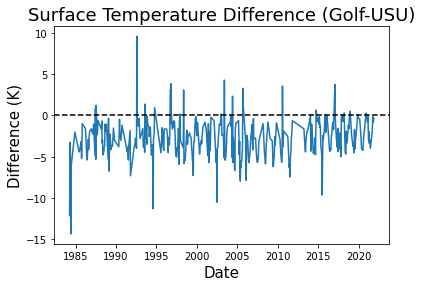

In [48]:
fig, ax = plt.subplots()
sns.lineplot(data=tsPandas_pivoted, x='date', y='Difference', ax=ax)

ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Difference (K)', fontsize = 15)
ax.set_title('Surface Temperature Difference (Golf-USU)', fontsize = 18)

ax.axhline(y=0, color='black', linestyle='--')

plt.savefig('Thermal_fullseries.png', dpi=300, bbox_inches='tight')
plt.show()

### Just Summer Months

In [49]:
tsPandas_pivoted = tsPandas_pivoted.set_index('date')

print(tsPandas_pivoted)

                      station_0   station_1  Difference
date                                                   
1984-04-06 17:34:57  271.761768  259.626905  -12.134863
1984-05-08 17:35:11  300.079276  296.849438   -3.229838
1984-06-09 17:36:00  280.922979  266.563516  -14.359463
1984-06-25 17:36:14  311.937869  305.919646   -6.018224
1984-12-02 17:37:44  268.988358  266.972009   -2.016349
...                         ...         ...         ...
2021-07-17 18:07:43  310.382498  307.102330   -3.280168
2021-09-03 18:08:02  299.926420  297.788521   -2.137899
2021-10-05 18:08:11  293.041188  292.895751   -0.145437
2021-10-21 18:08:14  289.364493  288.541948   -0.822545
2021-11-22 18:08:08  279.407151  279.077354   -0.329797

[459 rows x 3 columns]


In [50]:
tsPandas_pivoted.index = pd.to_datetime(tsPandas_pivoted.index, format='%Y-%m-%d')

# Filter data for June-October 1985-2022
filtered_data = tsPandas_pivoted.loc[
    (tsPandas_pivoted.index.month >= 5) & (tsPandas_pivoted.index.month <= 10) &
    (tsPandas_pivoted.index.year >= 1985) & (tsPandas_pivoted.index.year <= 2022)
]

In [51]:
print(filtered_data)

                      station_0   station_1  Difference
date                                                   
1985-06-12 17:37:54  308.445845  304.030315   -4.415530
1985-07-14 17:37:44  303.431483  299.238118   -4.193365
1985-08-15 17:37:27  307.156234  303.527529   -3.628705
1985-08-31 17:37:16  308.211209  304.993774   -3.217435
1985-09-16 17:37:03  298.840532  295.672894   -3.167639
...                         ...         ...         ...
2021-06-15 18:07:38  313.892354  309.919310   -3.973044
2021-07-17 18:07:43  310.382498  307.102330   -3.280168
2021-09-03 18:08:02  299.926420  297.788521   -2.137899
2021-10-05 18:08:11  293.041188  292.895751   -0.145437
2021-10-21 18:08:14  289.364493  288.541948   -0.822545

[305 rows x 3 columns]


In [52]:
mean_0 = filtered_data['station_0'].mean()
print(mean_0)

303.513573122247


In [53]:
mean_1 = filtered_data['station_1'].mean()
print(mean_1)

300.07398594577893


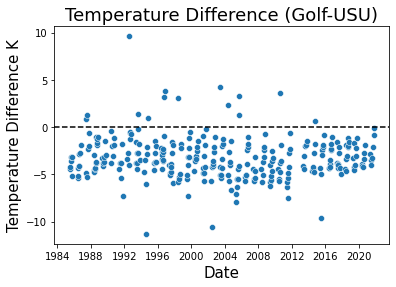

In [54]:
sns.scatterplot(data=filtered_data, x=filtered_data.index, y='Difference')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Temperature Difference K', fontsize = 15)
plt.title('Temperature Difference (Golf-USU)', fontsize = 18)

plt.axhline(y=0, color='black', linestyle='--')


#plt.savefig('summerthermal_plot.png', dpi=300, bbox_inches='tight')

<AxesSubplot:title={'center':'Summer Temperatures'}, xlabel='Date', ylabel='Temperature  K'>

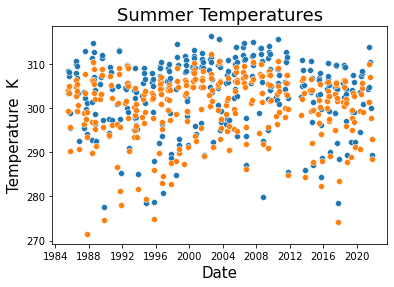

In [55]:
sns.scatterplot(data=filtered_data, x=filtered_data.index, y='station_0')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Temperature  K', fontsize = 15)
plt.title('Summer Temperatures', fontsize = 18)

sns.scatterplot(data=filtered_data, x=filtered_data.index, y='station_1')


#plt.savefig('summerthermal_plot.png', dpi=300, bbox_inches='tight')

In [56]:
#filtered_data.to_csv('summer_thermal.csv', index=True)

### 1990 to 1995

In [57]:
annual_data = filtered_data.loc['1990-05-01':'1996-05-01']

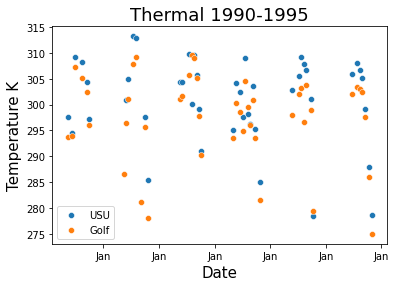

In [58]:
import matplotlib.dates as mdates

sns.scatterplot(data=annual_data, x=annual_data.index, y='station_0', label = 'USU', marker = 'o')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Temperature K', fontsize = 15)
plt.title('Thermal 1990-1995', fontsize = 18)

sns.scatterplot(data=annual_data, x=annual_data.index, y='station_1', label = 'Golf', marker = 'o')

date_format = mdates.DateFormatter('%b')  # Format to show month abbreviation
plt.gca().xaxis.set_major_formatter(date_format) 

plt.legend()

#plt.savefig('Thermal_annual_plot.png', dpi=300, bbox_inches='tight')

#### Plotting the mean for each year

In [59]:
mean_diff = filtered_data.groupby(filtered_data.index.year)['Difference'].mean()

In [60]:
mean_station_0 = filtered_data.groupby(filtered_data.index.year)['station_0'].mean()

In [61]:
mean_station_1= filtered_data.groupby(filtered_data.index.year)['station_1'].mean()

Text(0.5, 1.0, 'Mean Temperature Difference')

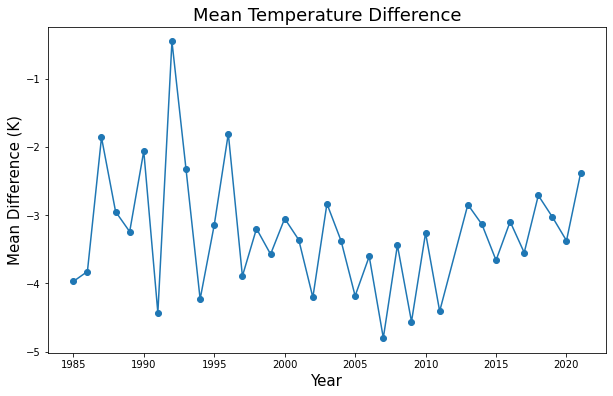

In [62]:
mean_diff.plot(kind='line', figsize=(10, 6), marker = 'o')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Mean Difference (K)', fontsize=15)
plt.title('Mean Temperature Difference', fontsize=18)


#plt.savefig('Thermalsummer_meandiff.png', dpi=300, bbox_inches='tight')

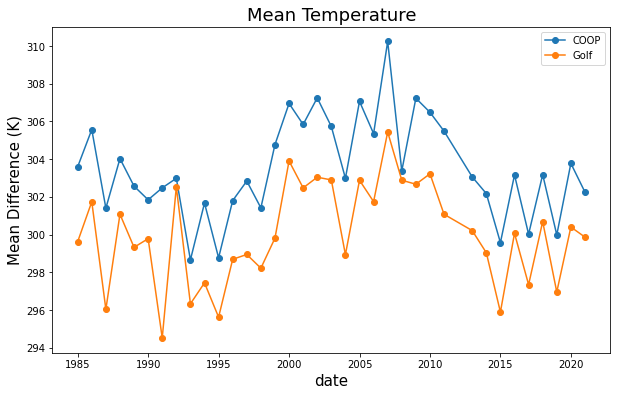

In [63]:
mean_station_0.plot(kind='line', figsize=(10, 6), marker = 'o', label = 'COOP')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Mean Difference (K)', fontsize=15)
plt.title('Mean Temperature', fontsize=18)

mean_station_1.plot(kind='line', figsize=(10, 6), marker = 'o', label = 'Golf')

plt.legend()

#plt.savefig('Thermalsummer_mean.png', dpi=300, bbox_inches='tight')